In [1]:
import numpy as np, random, math
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import collections

Wirte a code for structuring the data so that the library routine can find the maximal-margin solution.<br>
The location of the decesion boundary is given by the weights (w) and the bias (b).<br>
find the values for w and b which maximizes the margin (distance to any datapoint).
<img src="equations/optimize.png">

In [2]:
C = 1000
upper = False
threshold = 10**-5
kernelType = 'pol'

The objective equation (dual formulation)
<img src="equations/objective.png">

the optimization problem can be transformed into a different form, called the dual problem, which has some computational advantages. It makes it possible to use the kernel trick, which eleminates the need for evualuating the transformation function

In [3]:
def objective (alpha):
    return 0.5*np.dot(alpha,np.dot(alpha,pre_compute)) - np.sum(alpha)

the Kernel equations
<img src="equations/linearK.png">
<img src="equations/polynomialK.png">
<img src="equations/RBFK.png">

In [4]:
def kernel(a,b,pol=2,sigma=2):
    if kernelType == 'lin':
        return np.dot(a,b)
    
    elif kernelType == 'pol':
        return (np.dot(a,b) + 1)**pol
    
    elif kernelType == 'RBF':
        return math.exp(-np.linalg.norm(np.subtract(a,b),ord=2)/(2*sigma**2))
    else:
        raise Exception("Kernel not found")

In [5]:
def zerofun (alpha):
    return np.dot(alpha,targets)

bias (b) Value:
<img src="equations/b.png">

In [6]:
def b_calculator(non_zero):
    b = 0
    for current in non_zero:
        b += current['alpha']*current['t']*kernel(non_zero[0]['in'],current['in'])
    return b - non_zero[0]['t']

indicator equation:
<img src="equations/indicator.png">

In [7]:
def indicator(non_zero,unkown,b):
    ind = 0
    for current in non_zero:
        ind += current['alpha']*current['t']*kernel(unkown,current['in'])
    return ind - b    
    

In [8]:
#np.random.seed(100)
classA = np.concatenate((np.random.randn(10,2)*0.2+[1.5,0.5],
                        np.random.rand(10,2)*0.2+[-1.5,0.5]))
classB = np.random.randn(20,2)*0.2+[0.0,-0.5]

inputs = np.concatenate ((classA,classB))
targets = np.concatenate (
(np.ones(classA.shape[0]),
-np.ones(classB.shape[0])))

N = inputs.shape[0]

permute = list(range(N))
random.shuffle(permute)
inputs = inputs[permute, :]
targets = targets [permute]

In [9]:
pre_compute = np.zeros(shape=(N,N))
for i in range(N):
    for j in range(N):
        pre_compute[i][j]=targets[i]*targets[j]*kernel(inputs[i],inputs[j])

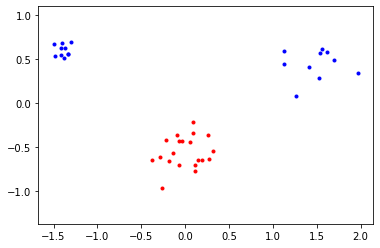

In [10]:
plt.plot([p[0] for p in classA],
        [p[1] for p in classA],
        'b.')
plt.plot([p[0] for p in classB],
        [p[1] for p in classB],
        'r.')

plt.axis('equal')
plt.savefig('svmplot.pdf')
plt.show()

In [11]:
initial_guess = np.zeros(N)


if upper:
    B= [(0,C) for b in range(N)]
else:
    B= [(0,None) for b in range(N)]

XC = {'type':'eq','fun':zerofun}

ret = minimize(objective,initial_guess,bounds=B,constraints=XC)
alpha = ret['x']
print(ret)

     fun: -0.6259571018677783
     jac: array([ 2.53391879,  1.54619292, -0.66991808,  0.9053752 ,  3.39399078,
        0.85554816, -0.57112041,  1.77714441, -0.65794178, -0.5618097 ,
        1.13119694, -0.51081048, -0.74835564, -0.76219051, -0.67530869,
        2.20067786,  0.85552047,  0.8563278 , -0.64713641,  0.92033953,
        1.02926326, -0.46453959, -0.46461038, -0.59035853, -0.32117444,
       -0.56377206,  0.9881973 , -0.50535651,  2.34780175,  1.34795926,
        1.19030945, -0.82822581,  0.85543963, -0.85621992,  2.06909688,
        1.09551863, -0.55886618, -0.66005386,  0.99935243, -0.70218846])
 message: 'Optimization terminated successfully'
    nfev: 536
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([0.00000000e+00, 2.98981836e-16, 0.00000000e+00, 5.47785975e-18,
       9.19041664e-16, 8.36616376e-02, 1.99836544e-16, 0.00000000e+00,
       0.00000000e+00, 5.43183352e-17, 8.94536536e-17, 1.22135660e-16,
       7.04737127e-16, 4.39655935e-16, 0.000

In [12]:
non_zero = []
for i, a in enumerate(alpha):
    #print(a)
    if a > threshold:
        non_zero.append({'alpha':a,'in':inputs[i],'t':targets[i]})
non_zero

[{'alpha': 0.08366163764692093,
  'in': array([1.26476081, 0.08662865]),
  't': 1.0},
 {'alpha': 0.12103383810624559,
  'in': array([-1.33945254,  0.55955607]),
  't': 1.0},
 {'alpha': 0.10334813163601728,
  'in': array([-1.33843646,  0.56301004]),
  't': 1.0},
 {'alpha': 0.3177246562258068,
  'in': array([1.13044572, 0.45152573]),
  't': 1.0},
 {'alpha': 0.6257682636149912,
  'in': array([ 0.085454  , -0.21239173]),
  't': -1.0}]

In [13]:
b = b_calculator(non_zero)

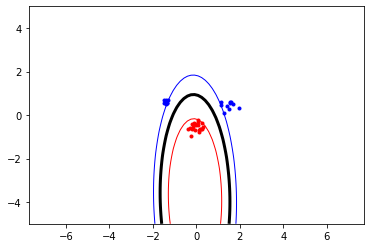

In [14]:
x_limits = 4
y_limits = 5
xgrid = np.linspace(-x_limits,x_limits)
ygrid = np.linspace(-y_limits,y_limits)

grid = np.array([[indicator(non_zero,[x,y],b)
                 for x in xgrid]
                for y in ygrid])

plt.plot([p[0] for p in classA],
        [p[1] for p in classA],
        'b.')
plt.plot([p[0] for p in classB],
        [p[1] for p in classB],
        'r.')

plt.contour(xgrid,ygrid,grid,
           (-1.0,0.0,1.0),
           colors=('red','black','blue'),
           linewidths=(1,3,1))


plt.axis('equal')
plt.savefig('svmplot.pdf')
plt.show()